In [1]:
import pandas as pd


In [2]:
data = pd.read_csv("XTern 2024 Artificial Intelegence Data Set - Xtern_TrainData.csv")
data.head()

,Year,Major,University,Time,Order
0,Year 2,Physics,Indiana State University,12,Fried Catfish Basket
1,Year 3,Chemistry,Ball State University,14,Sugar Cream Pie
2,Year 3,Chemistry,Butler University,12,Indiana Pork Chili
3,Year 2,Biology,Indiana State University,11,Fried Catfish Basket
4,Year 3,Business Administration,Butler University,12,Indiana Corn on the Cob (brushed with garlic b...


In [4]:
df = data.replace('Year', '', regex=True)

print(df)

     Year                    Major                University  Time   
0       2                  Physics  Indiana State University    12  \
1       3                Chemistry     Ball State University    14   
2       3                Chemistry         Butler University    12   
3       2                  Biology  Indiana State University    11   
4       3  Business Administration         Butler University    12   
...   ...                      ...                       ...   ...   
4995    2              Mathematics     Ball State University    11   
4996    3                Astronomy  Indiana State University    12   
4997    3                Chemistry         Butler University    13   
4998    3                Astronomy         Butler University    15   
4999    2                Economics  University of Notre Dame    15   

                                                  Order  
0                                  Fried Catfish Basket  
1                                       Sug

In [6]:
# Balance out all the answer
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imbpipeline
# Split data
from sklearn.model_selection import train_test_split
# One hot encoding 
df_encoded = pd.get_dummies(df, columns=['Major', 'University'])

# Label the order
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

df_encoded["Order"] = encoder.fit_transform(df_encoded["Order"])


X = df_encoded.drop("Order", axis=1)
y = df_encoded.Order
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_train, y_train)
print(X_res)

     Year  Time  Major_Accounting  Major_Anthropology  Major_Astronomy   
0     2.0    13             False               False            False  \
1     2.0    11             False               False             True   
2     3.0    13             False               False            False   
3     3.0    13             False               False            False   
4     2.0    13             False               False            False   
...   ...   ...               ...                 ...              ...   
3965  2.0    16             False               False            False   
3966  2.0    14             False               False             True   
3967  2.0    15             False               False            False   
3968  2.0    13             False               False             True   
3969  2.0    14             False               False             True   

      Major_Biology  Major_Business Administration  Major_Chemistry   
0             False                     

In [8]:
#print all unique majors
# Print unique values for each column
for col in X_res.columns:
    print(f"Unique values in {col}: {X_res[col].unique()}")

Unique values in Year: [2.0 3.0 4.0 1.0 2.3825184903722834 2.9093935654671794 2.4367117821544606
 2.3167364811745417 2.391060607573241 2.046450412719998 2.122038234844779
 2.921874235023117 2.0884925020519196 2.388677289689482 2.5680549813578843
 2.0205844942958024 2.767228659569696]
Unique values in Time: [13 11 14 12 10 16 15  9  8 17]
Unique values in Major_Accounting: [False  True]
Unique values in Major_Anthropology: [False  True]
Unique values in Major_Astronomy: [False  True]
Unique values in Major_Biology: [False  True]
Unique values in Major_Business Administration: [False  True]
Unique values in Major_Chemistry: [ True False]
Unique values in Major_Civil Engineering: [False  True]
Unique values in Major_Economics: [False  True]
Unique values in Major_Finance: [False  True]
Unique values in Major_Fine Arts: [False  True]
Unique values in Major_International Business: [False  True]
Unique values in Major_Marketing: [False  True]
Unique values in Major_Mathematics: [False  True]

In [9]:
unique_counts = X_res.nunique()

print(unique_counts)

Year                                                                    17
Time                                                                    10
Major_Accounting                                                         2
Major_Anthropology                                                       2
Major_Astronomy                                                          2
Major_Biology                                                            2
Major_Business Administration                                            2
Major_Chemistry                                                          2
Major_Civil Engineering                                                  2
Major_Economics                                                          2
Major_Finance                                                            2
Major_Fine Arts                                                          2
Major_International Business                                             2
Major_Marketing          

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")

# Plot
plt.figure(figsize=(14,10))
sns.countplot(data=X_res, x='University')
plt.xticks(rotation=270)
plt.title("Distribution of Unique Values in Column A")
plt.show()

ValueError: Could not interpret input 'University'

<Figure size 1400x1000 with 0 Axes>

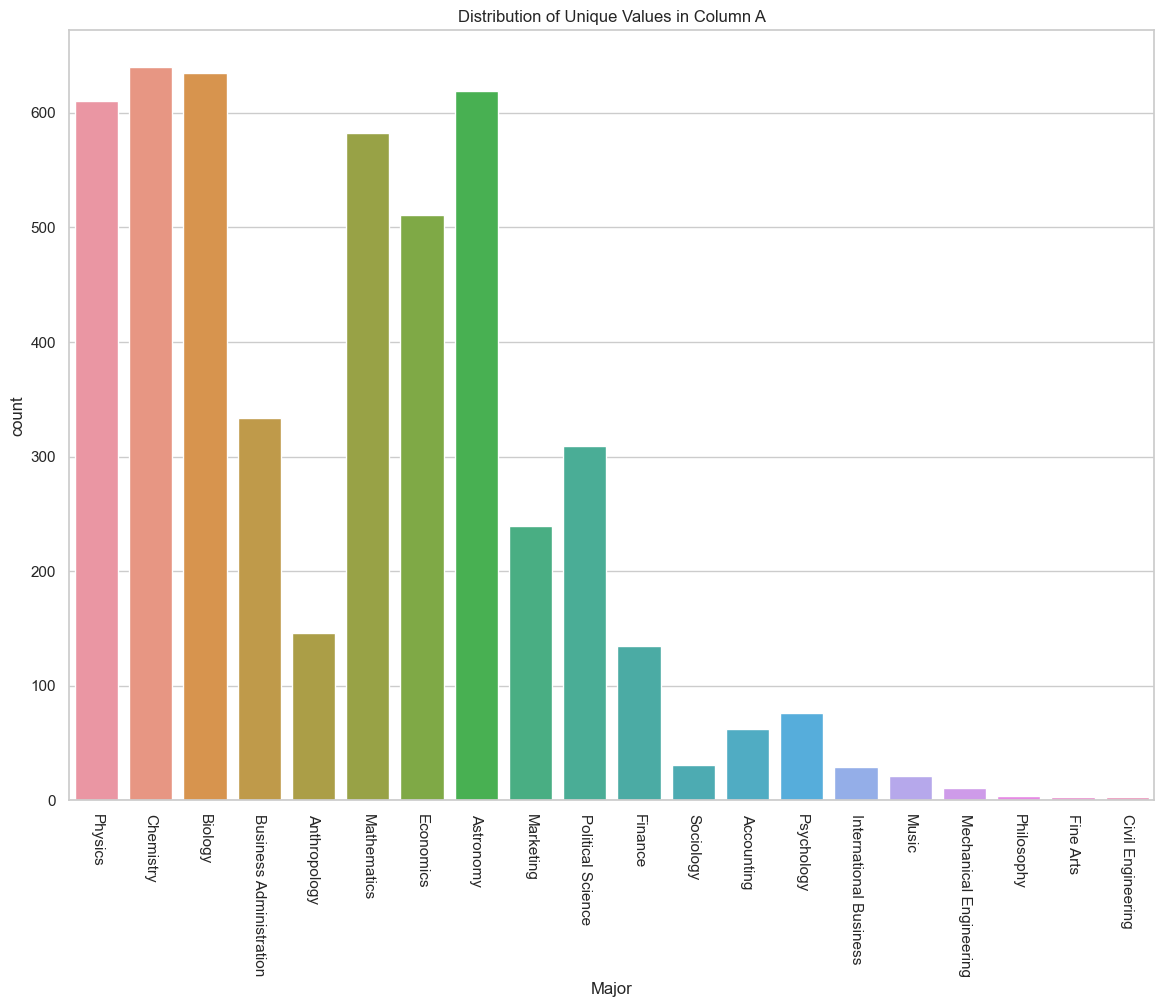

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")

# Plot
plt.figure(figsize=(14,10))
sns.countplot(data=df, x='Major')
plt.xticks(rotation=270)
plt.title("Distribution of Unique Values in Column A")
plt.show()

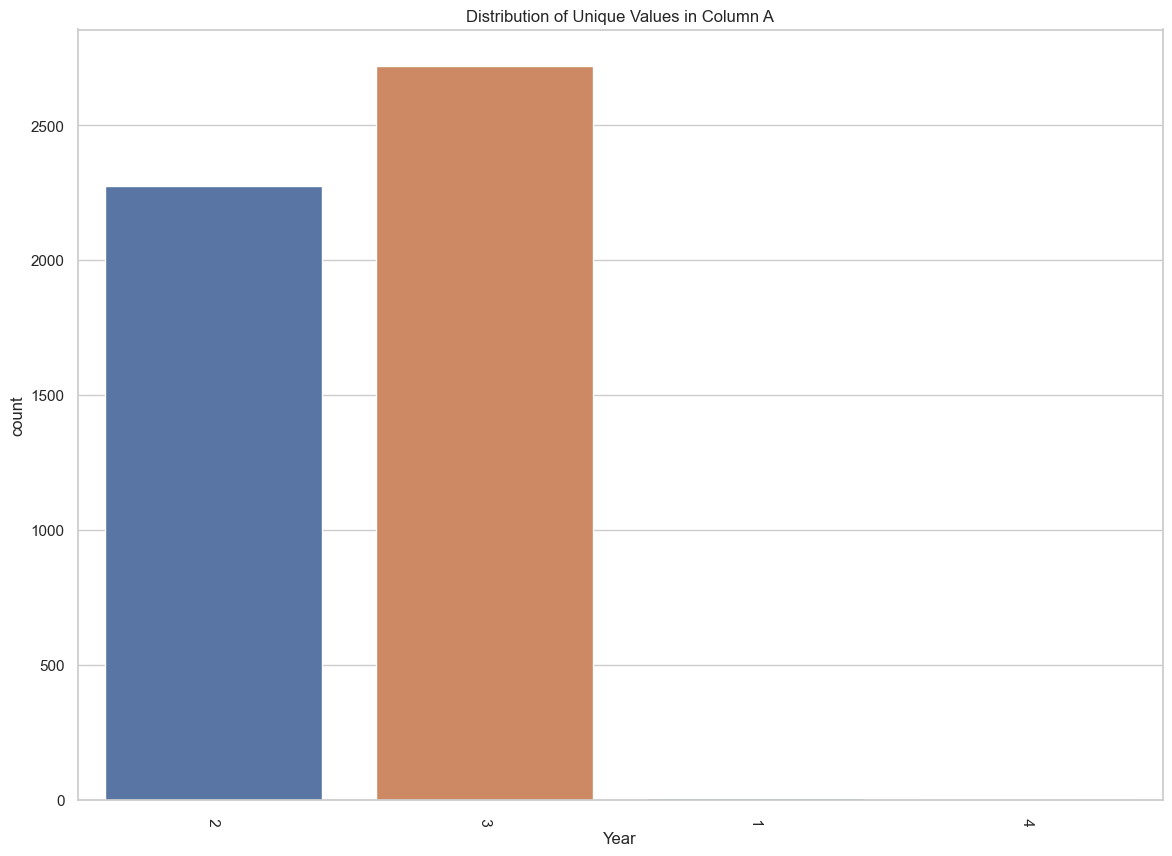

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")

# Plot
plt.figure(figsize=(14,10))
sns.countplot(data=df, x='Year')
plt.xticks(rotation=270)
plt.title("Distribution of Unique Values in Column A")
plt.show()

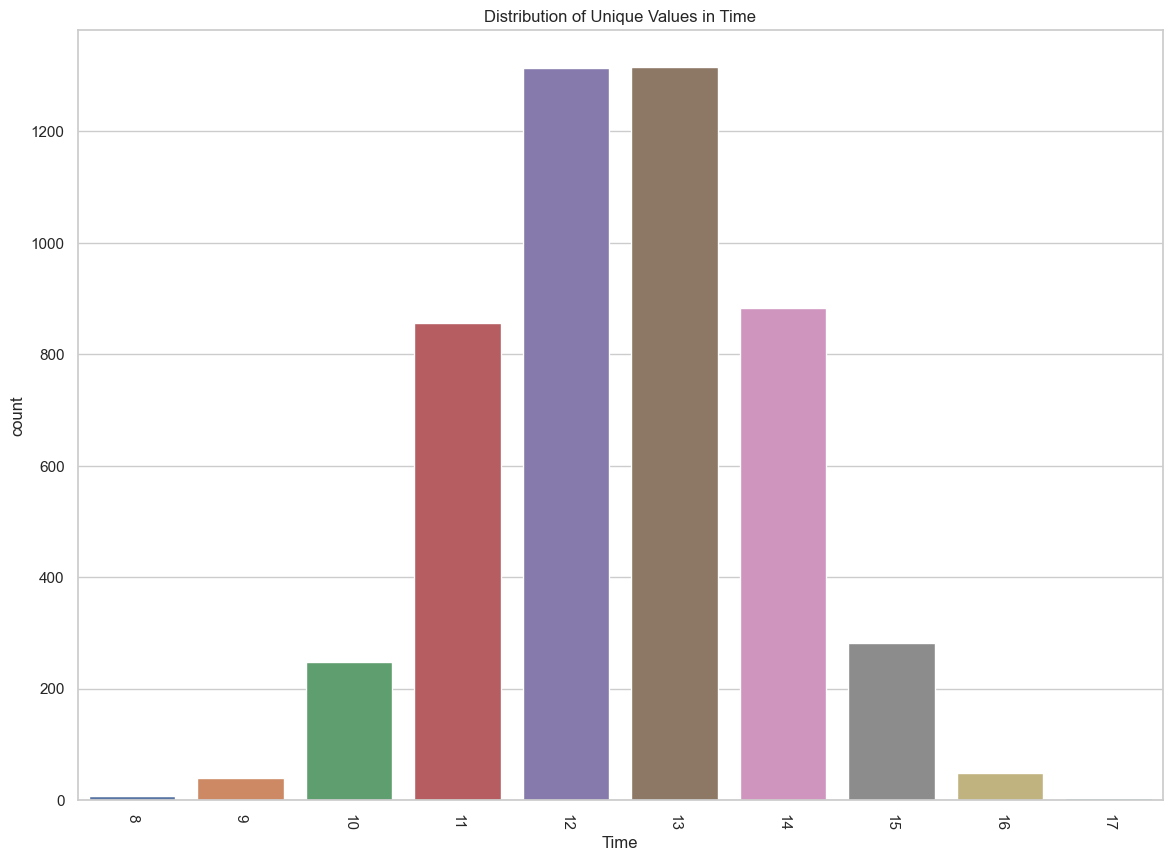

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")

# Plot
plt.figure(figsize=(14,10))
sns.countplot(data=df, x='Time')
plt.xticks(rotation=270)
plt.title("Distribution of Unique Values in Time")
plt.show()

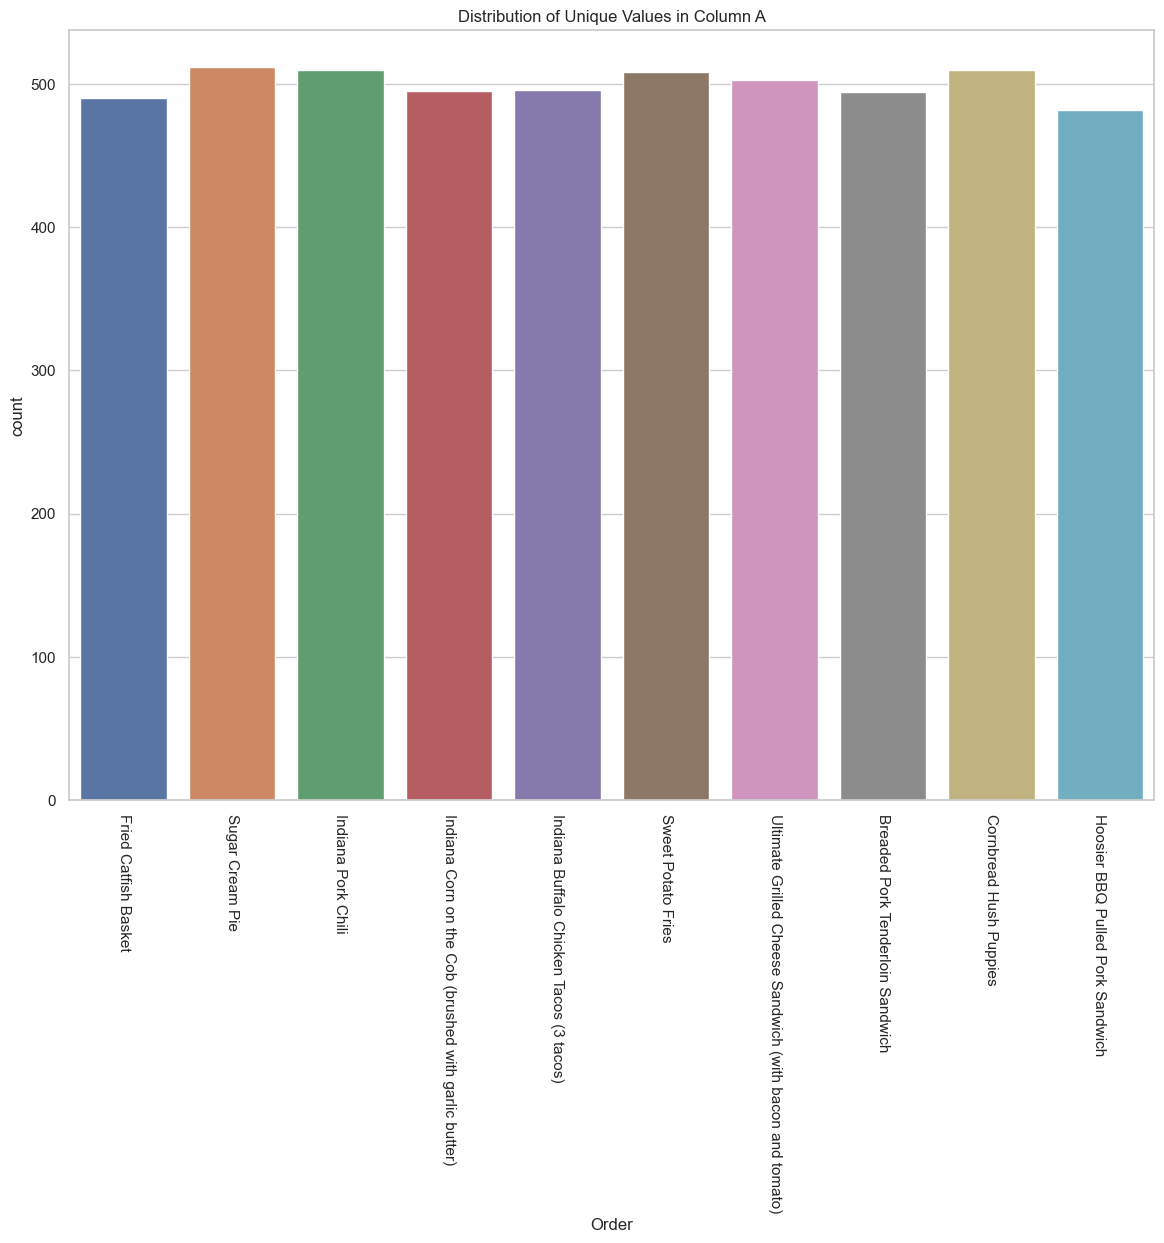

In [19]:

import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")

# Plot
plt.figure(figsize=(14,10))
sns.countplot(data=df, x='Order')
plt.xticks(rotation=270)
plt.title("Distribution of Unique Values in Column A")
plt.show()

     Year  Time  Order  Major_Accounting  Major_Anthropology  Major_Astronomy   
0       2    12      2             False               False            False  \
1       3    14      7             False               False            False   
2       3    12      6             False               False            False   
3       2    11      2             False               False            False   
4       3    12      5             False               False            False   
...   ...   ...    ...               ...                 ...              ...   
4995    2    11      0             False               False            False   
4996    3    12      9             False               False             True   
4997    3    13      7             False               False            False   
4998    3    15      7             False               False             True   
4999    2    15      0             False               False            False   

      Major_Biology  Major_

In [27]:
print(df_encoded.Order)

0       2
1       7
2       6
3       2
4       5
       ..
4995    0
4996    9
4997    7
4998    7
4999    0
Name: Order, Length: 5000, dtype: int64


In [33]:
print("Length of X_train" ,len(X_train))
print("Length of X_test" ,len(X_test))

Length of X_train 3750
Length of X_test 1250


In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import xgboost as xgb
import numpy as np
pipeline = Pipeline([
    ('scaler', StandardScaler()), 
    ('classifier', LogisticRegression())
])

search_space = [
    {
        'classifier': [LogisticRegression()],
        'classifier__penalty': ['l1', 'l2'],
        'classifier__C': np.logspace(0, 4, 10)
    },
    {
        'classifier': [RandomForestClassifier()],
        'classifier__n_estimators': [10, 50, 100, 200],
        'classifier__max_features': ['sqrt', 'log2']
    },
    {
        'classifier': [SVC()],
        'classifier__kernel': ['linear', 'rbf'],
        'classifier__C': [0.1, 1, 10],
        'classifier__gamma': [0.001, 0.01, 0.1, 1]
    }
]
grid_search = GridSearchCV(pipeline, search_space, cv=5, verbose=1, n_jobs=-1)
grid_search.fit(X_res, y_res)
print("Best model:", grid_search.best_estimator_)
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

Fitting 5 folds for each of 52 candidates, totalling 260 fits


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sciki

Best model: Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier', SVC(C=10, gamma=0.1))])
Best parameters: {'classifier': SVC(C=10, gamma=0.1), 'classifier__C': 10, 'classifier__gamma': 0.1, 'classifier__kernel': 'rbf'}
Best cross-validation score: 0.6662468513853904


Confusion Matrix:
[[53  7  4  3  2 17 10  7  2 17]
 [ 4 85  3  2 21  9  3 11  1  4]
 [ 7 11 81  1  4  2  4  1 13  6]
 [ 0  0  0 89 12  0  1  8 19  1]
 [ 2 11  3  8 67  5  0  4  3 10]
 [ 4  3  0  0  0 93  6  1  0  1]
 [ 5  3  1  0  1  0 99  1  0  3]
 [ 2  5  1 20  6  7  6 81  0  3]
 [ 1  6 17  7  3  1  4 15 72  8]
 [ 4  5  0  6  6  6  0  1  4 94]]


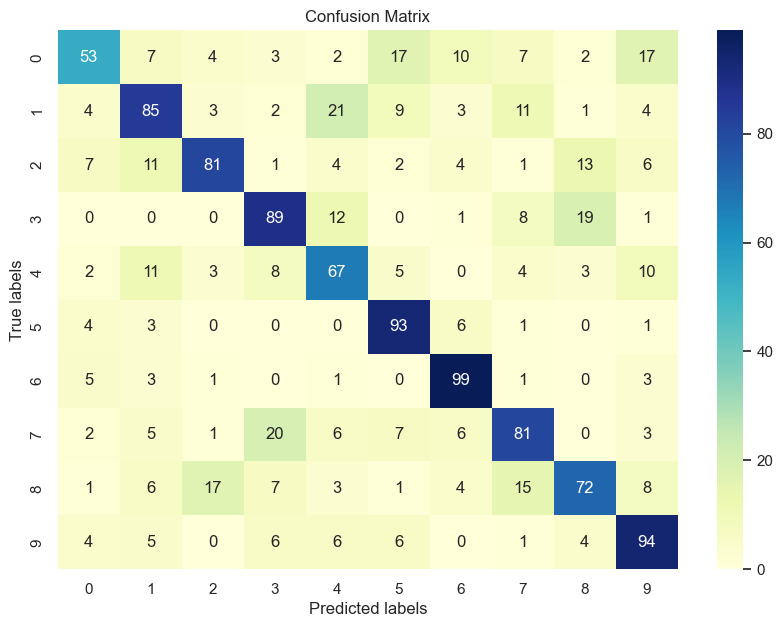

Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.43      0.52       122
           1       0.62      0.59      0.61       143
           2       0.74      0.62      0.68       130
           3       0.65      0.68      0.67       130
           4       0.55      0.59      0.57       113
           5       0.66      0.86      0.75       108
           6       0.74      0.88      0.80       113
           7       0.62      0.62      0.62       131
           8       0.63      0.54      0.58       134
           9       0.64      0.75      0.69       126

    accuracy                           0.65      1250
   macro avg       0.65      0.66      0.65      1250
weighted avg       0.65      0.65      0.65      1250

Accuracy: 0.6512


In [12]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
y_pred = grid_search.best_estimator_.predict(X_test)
# Print raw confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Visualize the confusion matrix using Seaborn
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="YlGnBu", fmt="d")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Accuracy:", accuracy_score(y_test, y_pred))

In [14]:
# XGBOOSt
pipeline_1 = Pipeline([
    ('scaler', StandardScaler()), 
    ('classifier', xgb.XGBClassifier())
])
search_space_1 = {
    'classifier__learning_rate': [0.01, 0.1, 0.5],
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [3, 4, 5, 6],
    'classifier__subsample': [0.8, 0.9, 1],
    'classifier__colsample_bytree': [0.8, 0.9, 1],
}
grid_search_1 = GridSearchCV(pipeline_1, search_space_1, cv=5, verbose=1, n_jobs=-1)
grid_search_1.fit(X_res, y_res)
print("Best model:", grid_search_1.best_estimator_)
print("Best parameters:", grid_search_1.best_params_)
print("Best cross-validation score:", grid_search_1.best_score_)


Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best model: Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=0.8, early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=0.5,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=3, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               mono

Confusion Matrix:
[[ 56   1   7   0   3  23  10   7   1  14]
 [  4  84   4   1  20  11   4  10   0   5]
 [  7  12  89   1   2   2   4   0  11   2]
 [  0   0   0  86  13   0   1   8  21   1]
 [  2   8   3  11  68   3   1   5   0  12]
 [  2   2   0   0   0  94   6   3   0   1]
 [  4   0   1   0   2   2 100   0   3   1]
 [  2   5   1  18  10   4   6  80   0   5]
 [  2   7  12   8   3   0   4  15  75   8]
 [  4   6   3   3   5   6   0   2   8  89]]


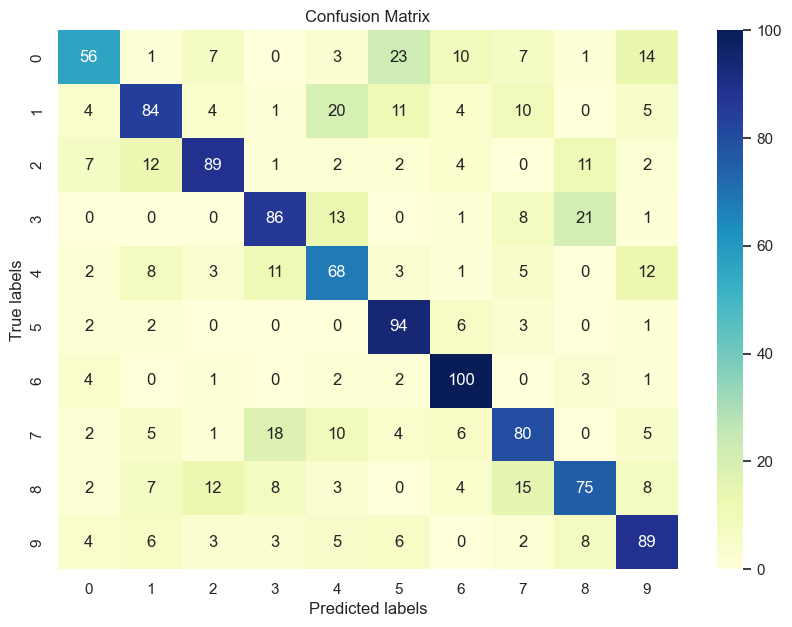

Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.46      0.55       122
           1       0.67      0.59      0.63       143
           2       0.74      0.68      0.71       130
           3       0.67      0.66      0.67       130
           4       0.54      0.60      0.57       113
           5       0.65      0.87      0.74       108
           6       0.74      0.88      0.80       113
           7       0.62      0.61      0.61       131
           8       0.63      0.56      0.59       134
           9       0.64      0.71      0.67       126

    accuracy                           0.66      1250
   macro avg       0.66      0.66      0.65      1250
weighted avg       0.66      0.66      0.65      1250

Accuracy: 0.6568


In [39]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
y_pred = grid_search_1.best_estimator_.predict(X_test)
# Print raw confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Visualize the confusion matrix using Seaborn
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="YlGnBu", fmt="d")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Accuracy:", accuracy_score(y_test, y_pred))
